### **Interm Report**
### **Appendix**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [107]:
from scipy.integrate import odeint

def dU_dt(U, t):
    # U is a vector such that x=U[0] and y=U[1]. This function returns [x', y']
    return [U[1], -alpha*np.abs(U[1])*U[1]-U[0]+K/(1-U[0])**2]

In [108]:
alpha = 100
K = 0.01

U0 = [0, 0]
ts = np.linspace(0, 20, 200)
Us = odeint(dU_dt, U0, ts)
xs = Us[:,0]

In [109]:
def plot_sol(ts,xs):
    plt.plot(ts,xs)
    plt.xlabel('t')
    plt.ylabel('x')
    plt.show()

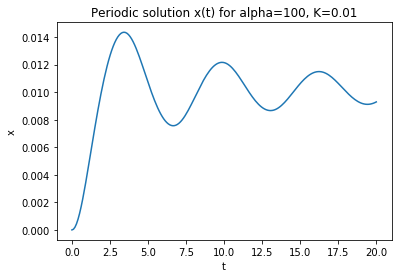

In [110]:
plt.title("Periodic solution x(t) for alpha=100, K=0.01");
plot_sol(ts,xs)

In [114]:
def phase_diagram(alpha, K, l1, u1, l2, u2, n):
    y1 = np.linspace(l1, u1, n)
    y2 = np.linspace(l2, u2, n)

    Y1, Y2 = np.meshgrid(y1, y2)

    t = 0
    u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
    NI, NJ = Y1.shape

    for i in range(NI):
        for j in range(NJ):
            U = [Y1[i, j], Y2[i, j]]
            yprime = dU_dt(U, t)
            u[i,j] = yprime[0]
            v[i,j] = yprime[1]

    ic = np.linspace(1.0, 3.0, 21)
    for r in ic:
        P0 = [r, 1.0]
        Ps = odeint(dU_dt, U0, ts)
        plt.plot(Ps[:,0], Ps[:,1], "-", color='C7') # path
        plt.plot([Ps[0,0]], [Ps[0,1]], 'o', color='C3') # start
        plt.plot([Ps[-1,0]], [Ps[-1,1]], 'o', color='C1') # end
    
    plt.quiver(Y1, Y2, u, v, color='C0')    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

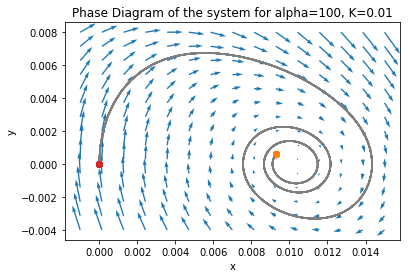

In [115]:
plt.title("Phase Diagram of the system for alpha=100, K=0.01");
phase_diagram(alpha, K, -0.001, 0.015, -0.004, 0.008, 15)

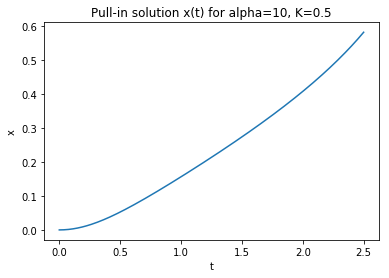

In [117]:
alpha = 10
K = 0.5

U0 = [0, 0]
ts = np.linspace(0, 2.5, 200)
Us = odeint(dU_dt, U0, ts)
xs = Us[:,0]

plt.title("Pull-in solution x(t) for alpha=10, K=0.5");
plot_sol(ts,xs)

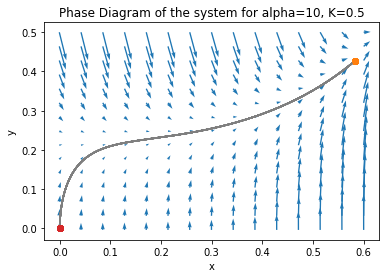

In [118]:
plt.title("Phase Diagram of the system for alpha=10, K=0.5");
phase_diagram(alpha, K, -0.001, 0.6, -0.004, 0.5, 15)